In [1]:
using LinearAlgebra, Plots, Printf, Latexify, LaTeXStrings, BenchmarkTools, SparseArrays

In [2]:
function jacobi(A, b, x0, tol, max_iter)
  n, = size(b)
  x = zeros(Float64, n)
  xnew = zeros(Float64, n)
  err = zeros(Float64, max_iter + 1)
  b2norm = norm(b)
  err[1] = norm(b - A * x0) / b2norm
  k = 1
  while (err[k] > tol && k < max_iter)
    k += 1
    xnew .= 0.
    for i = 1:n
      for j = 1:n
        if j != i
          xnew[i] += A[i, j] * x[j]
        end
      end
      xnew[i] = (b[i] - xnew[i]) / A[i, i]
    end
    x .= xnew
    err[k] = norm(A * x - b) / b2norm
  end
  return x, err[1:k]
end;

In [3]:
function gauss_seidel(A, b, x0, tol, max_iter)
  n, = size(b)
  x = zeros(Float64, n)
  err = zeros(Float64, max_iter + 1)
  b2norm = norm(b)
  err[1] = norm(b - A * x0) / b2norm
  k = 1
  while (err[k] > tol && k < max_iter)
    k += 1
    for i = 1:n
      sigma = 0.
      for j = 1:n
        if j != i
          sigma += A[i, j] * x[j]
        end
      end
      x[i] = (b[i] - sigma) / A[i, i]
    end
    err[k] = norm(A * x - b) / b2norm
  end
  return x, err[1:k]
end;

In [4]:
function SOR(A, b, x0, tol, max_iter, omega = 1.5)
  n, = size(b)
  x = zeros(Float64, n)
  err = zeros(Float64, max_iter + 1)
  b2norm = norm(b)
  err[1] = norm(b - A * x0) / b2norm
  k = 1
  while (err[k] > tol && k < max_iter)
    k += 1
    for i = 1:n
      sigma = 0.
      for j = 1:n
        if j != i
          sigma += A[i, j] * x[j]
        end
      end
      sigma = (b[i] - sigma) / A[i, i]
      x[i] += omega * (sigma - x[i])
    end
    err[k] = norm(A * x - b) / b2norm
  end
  return x, err[1:k]
end;

In [5]:
n = 5_000;
A = spdiagm(n, n, 0=>2.0*ones(n), 1=>0.5.*ones(n - 1), -1=>0.5.*ones(n - 1))

5000×5000 SparseMatrixCSC{Float64, Int64} with 14998 stored entries:
⎡⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⎦

In [6]:
b = rand(n);
x0 = rand(n);
max_iter = 1_000;
tol = 1e-6;

In [7]:
_, err_jacobi = @btime jacobi(A, b, x0, tol, max_iter);
_, err_gs = @btime gauss_seidel(A, b, x0, tol, max_iter);
_, err_sor = @btime SOR(A, b, x0, tol, max_iter);

  1.486 s (138 allocations: 1.69 MiB)
  884.643 ms (87 allocations: 1.04 MiB)
  2.264 s (201 allocations: 2.49 MiB)


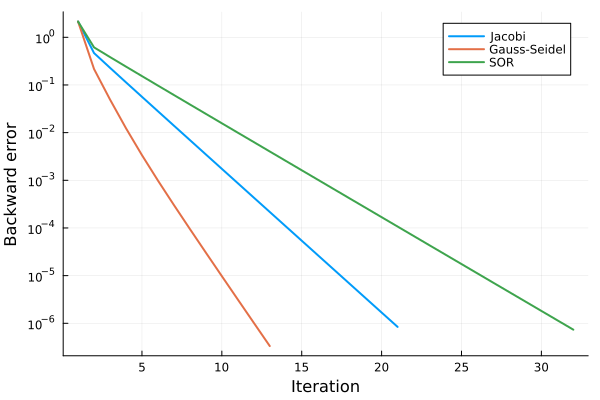

In [8]:
plot([i for i in 1:length(err_jacobi)], err_jacobi, yscale=:log10, xlabel="Iteration", ylabel="Backward error", label="Jacobi", linewidth=2)
plot!([i for i in 1:length(err_gs)], err_gs, yscale=:log10, label="Gauss-Seidel", linewidth=2)
plot!([i for i in 1:length(err_sor)], err_sor, yscale=:log10, label="SOR", linewidth=2)